# Bank Churn Prediction

### Brandon Lotus
#### - _Exploratory Data Analysis_

### Defining Problem

Semakin majunya bisnis perbankan bukan hanya meningkatkan opportunity tiap bank namun juga terdapat permasalahan yang timbul oleh karena persaingan bisnis. Salah satu permasalahan adalah kemungkinan nasabah bank untuk pindah ke fasilitas perbankan lain (https://www.ipsos.com/en-us/23-banking-customers-are-high-value-and-risk-leaving-their-financial-institution)

Apabila nasabah pindah bank, bukan hanya uang nasabah ikut berpindah juga dibutuhkan cost dalam marketing, promosi dan lain-lain untuk mendapatkan nasabah baru. Oleh karena kehilangan uang dan juga tambahan cost yang besar, sangat penting untuk mempertahankan nasabah sebuah bank.

Dalam kasus ini sebuah bank X juga mengalami permasalahan diatas, dimana sekitar 20% nasabahnya meninggalkan bank tersebut.

In [50]:
df['Exited'].value_counts()/len(df)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

### Defining Project Goals

Untuk mengatasi permasalahan di atas, tim DS bank X ditugaskan untuk menganalisa faktor-faktor nasabah yang pindah bank menggunakan feature dan data dalam dataset.

Hasil analisa tersebut diharapkan dapat digunakan untuk membuat suatu model machine learning yang dapat memprediksi apakah seorang nasabah akan pindah bank atau tidak.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describe Data

In [4]:
# Mengetahui jumlah keseluruhan data (14 kolom dan 10000 baris data)
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

# Mean credit score 650 (range 350-850)
# Mean age 39 tahun (range 18-92 tahun)
# Mean tenure 5 tahun (range 0-10 tahun)
# Mean balance 76 ribu (range 0-250 ribu)
# Kebanyakan customer punya 1 produk bank, maks 4 produk
# Kebanyakan customer punya kartu kredit
# Mean salary 100 ribu (min 11, maks 200 ribu)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

# Surname customer terbanyak adalah Smith (32 orang)
# Customer paling banyak di France (data dari 3 negara)
# Gender male lebih banyak dari female

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
# Mendeskripsi tiap kolom, mengidentifikasi fitur-fitur untuk analisa data dan tipe datanya
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
pd.DataFrame(data = bankDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

# Terdapat 13 kolom dengan kolom Exited sebagai kolom target yang menentukan pindahnya nasabah
# Terdapat 7 features dengan tipe data kategorikal (Surname, Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember dan Exited)
# Terdapat 6 features dengan tipe data numerikal (CustomerId, CreditScore, Age, Tenure, Balance dan EstimatedSalary)

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,RowNumber,int64,0,0.0,10000,"[3053, 5743]"
1,CustomerId,int64,0,0.0,10000,"[15727619, 15752375]"
2,Surname,object,0,0.0,2932,"[Gray, Yermakova]"
3,CreditScore,int64,0,0.0,460,"[809, 837]"
4,Geography,object,0,0.0,3,"[Germany, Spain]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Age,int64,0,0.0,70,"[31, 56]"
7,Tenure,int64,0,0.0,11,"[7, 9]"
8,Balance,float64,0,0.0,6382,"[139625.34, 111920.13]"
9,NumOfProducts,int64,0,0.0,4,"[1, 4]"


In [11]:
# Mengidentifikasi missing value dalam dataset
df.isna().sum()

# Tidak ada missing value dalam dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Handling Outiers

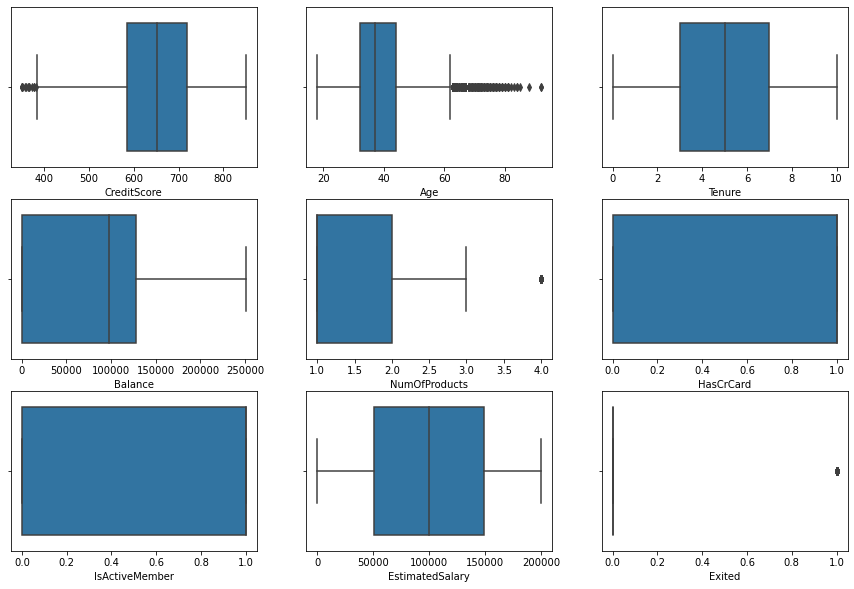

In [21]:
# Melihat outliers dengan boxplot
df_box = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender'])
plt.figure(figsize = (15, 10))
x = 1      
for i in df_box.describe():
    plt.subplot(3,3,x)
    sns.boxplot(df[i])
    x += 1
    
# Ada outliers di kolom CreditScore, Age dan NumOfProducts

In [16]:
# Outliers Credit Score
Q1_cs = df.describe()['CreditScore']['25%']
Q3_cs = df.describe()['CreditScore']['75%']
IQR_cs = Q3_cs - Q1_cs
Upper_Fence_cs = Q3_cs + (1.5 * IQR_cs)
Lower_Fence_cs = Q1_cs - (1.5 * IQR_cs)
out_cs = df[(df['CreditScore'] < Lower_Fence_cs) | (df['CreditScore'] > Upper_Fence_cs)]
print(f'Upper Fence Credit Score: {Upper_Fence_cs}')
print(f'Lower Fence Credit Score: {Lower_Fence_cs}')
print(f'Jumlah Outliers Credit Score: {len(out_cs)}')

Upper Fence Credit Score: 919.0
Lower Fence Credit Score: 383.0
Jumlah Outliers Credit Score: 15


In [19]:
# Outliers Age
Q1_a = df.describe()['Age']['25%']
Q3_a = df.describe()['Age']['75%']
IQR_a = Q3_a - Q1_a
Upper_Fence_a = Q3_a + (1.5 * IQR_a)
Lower_Fence_a = Q1_a - (1.5 * IQR_a)
out_a = df[(df['Age'] < Lower_Fence_a) | (df['Age'] > Upper_Fence_a)]
print(f'Upper Fence Age: {Upper_Fence_a}')
print(f'Lower Fence Age: {Lower_Fence_a}')
print(f'Jumlah Outliers Age: {len(out_a)}')

Upper Fence Age: 62.0
Lower Fence Age: 14.0
Jumlah Outliers Age: 359


In [23]:
# Outliers NumOfProducts
Q1_np = df.describe()['NumOfProducts']['25%']
Q3_np = df.describe()['NumOfProducts']['75%']
IQR_np = Q3_np - Q1_np
Upper_Fence_np = Q3_np + (1.5 * IQR_np)
Lower_Fence_np = Q1_np - (1.5 * IQR_np)
out_np = df[(df['NumOfProducts'] < Lower_Fence_np) | (df['NumOfProducts'] > Upper_Fence_np)]
print(f'Upper Fence NumOfProducts: {Upper_Fence_np}')
print(f'Lower Fence NumOfProducts: {Lower_Fence_np}')
print(f'Jumlah Outliers NumOfProducts: {len(out_np)}')

Upper Fence NumOfProducts: 3.5
Lower Fence NumOfProducts: -0.5
Jumlah Outliers NumOfProducts: 60


### Data Analysis

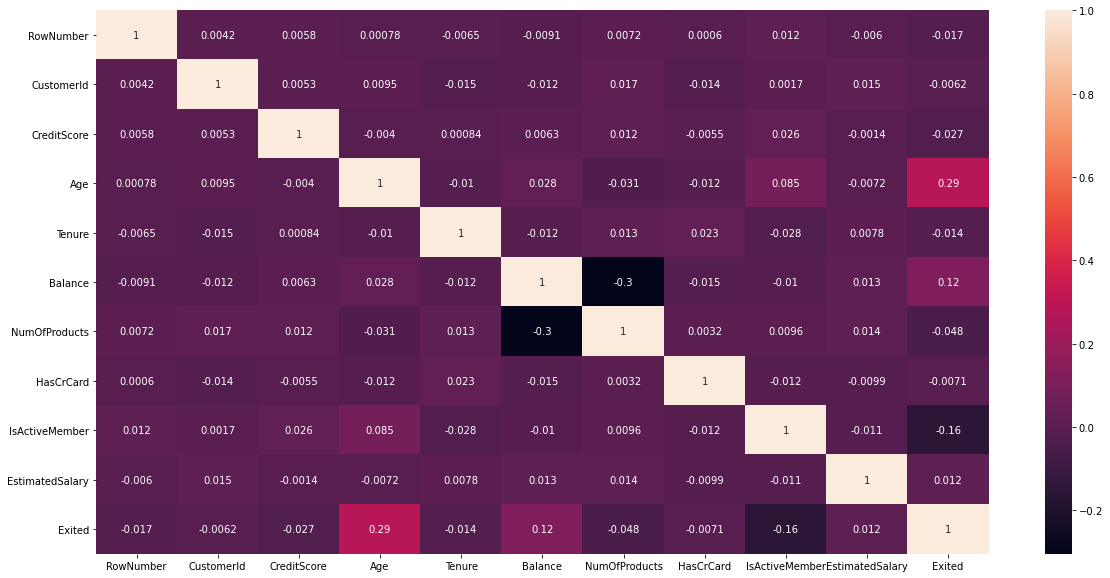

In [28]:
# Melihat korelasi antar features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
# Melihat korelasi features dengan target Exited
kor = df.corr()
kor['Exited'].sort_values(ascending = False)[1:]

# Feature dengan korelasi tertinggi adalah Age
# Features dengan korelasi positif hanya Age, Balance dan EstimatedSalary (berbanding lurus)
# Features lain memiliki korelasi negatif (berbanding terbalik)

Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [25]:
# Melihat perbandingan jumlah customer yang pindah bank
df['Exited'].value_counts()

# 0 = Tidak pindah
# 1 = Pindah

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
# Melihat perbandingan dari Surname customer
df['Surname'].value_counts()

# Terbanyak customer dengan Surname Smith (32 orang)

Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Hare        1
Fabro       1
Cawker      1
Barwell     1
Beyer       1
Name: Surname, Length: 2932, dtype: int64

In [7]:
df['Geography'].value_counts()

# Terbanyak customer dari France
# Customer dari Germany dan Spain hampir sama

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
# Perbandingan customer pindah (Exited) dari faktor negara
pd.crosstab(index = df['Geography'], columns = df['Exited'], normalize = 'index')

# Persentase customer dari France yang pindah paling rendah (16%)
# Persentase customer dari Germany yang pindah paling tinggi (32%)

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [16]:
df['Gender'].value_counts(normalize = True)

# Customer male lebih banyak (55%)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [17]:
# Perbandingan customer pindah (Exited) dari faktor gendernya (Male & Female)
pd.crosstab(index = df['Gender'], columns = df['Exited'], normalize = 'index')

# Customer female lebih mungkin pindah bank (25%) dibandingkan male (16%)

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [25]:
df['Tenure'].value_counts(normalize = True)

# Customer paling banyak diberikan tenure 2 tahun (10.5%)
# Paling sedikit 0 tahun (4.1%) dan 10 tahun (4.9%)

2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64

In [29]:
df.groupby('Exited')['Balance'].mean()

# Rata-rata balance customer yang pindah lebih tinggi

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [19]:
df['NumOfProducts'].value_counts(normalize = True)

# Kebanyakan customer punya 1 atau 2 produk (95%)
# Hanya sedikit yang punya 3-4 produk

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

In [27]:
# Perbandingan customer pindah (Exited) dari jumlah produk
pd.crosstab(index = df['NumOfProducts'], columns = df['Exited'], normalize = 'index')

# Customer dengan produk banyak besar kemungkinan pindah (3 produk 83% dan 4 produk 100%)
# Customer dengan 2 produk paling kecil kemungkinan pindah (8%)

Exited,0,1
NumOfProducts,,
1,0.722856,0.277144
2,0.924183,0.075817
3,0.172932,0.827068
4,0.000000,1.000000


In [21]:
df['HasCrCard'].value_counts(normalize = True)

# Kebanyakan customer punya kartu kredit (70%)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [22]:
# Perbandingan customer pindah (Exited) dari memiliki kartu kredit
pd.crosstab(index = df['HasCrCard'], columns = df['Exited'], normalize = 'index')

# Tidak ada perbedaan persentase pindahnya customer dari fitur kartu kredit (20-21%)

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [23]:
df['IsActiveMember'].value_counts(normalize = True)

# Sekitar 52% customer adalah member aktif

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [24]:
# Perbandingan customer pindah (Exited) dari faktor member aktif
pd.crosstab(index = df['IsActiveMember'], columns = df['Exited'], normalize = 'index')

# Customer yang bukan member aktif lebih mungkin pindah bank (27%) dibanding yang member aktif (14%)

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


### Data Visualization

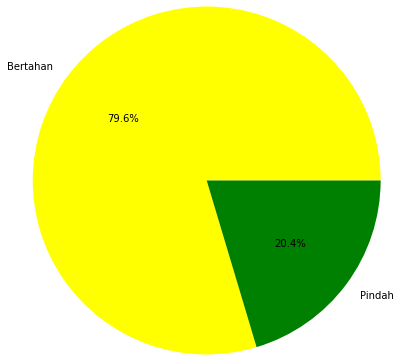

In [64]:
# Visualisasi persentase customer pindah dan bertahan
persentase = df.Exited.value_counts().values
nama = ['Bertahan','Pindah']
plt.pie(persentase, labels=nama,
        colors= ['yellow','green'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 2)
plt.show()

# Dapat dilihat bahwa dari data, customer yang pindah sebanyak 20.4% dan yang tetap bertahan 79.6%

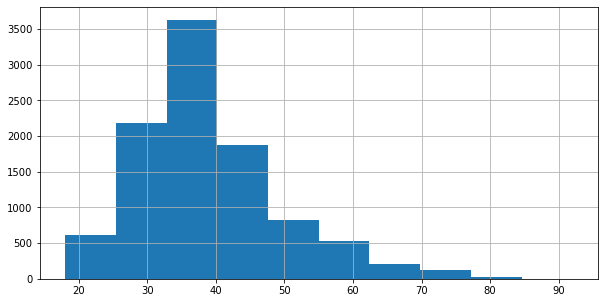

In [61]:
# Visualisasi persebaran umur customer
plt.figure(figsize = (10,5))
df['Age'].hist()
plt.show()

# Customer terbanyak di rentang usia 30-40 tahun

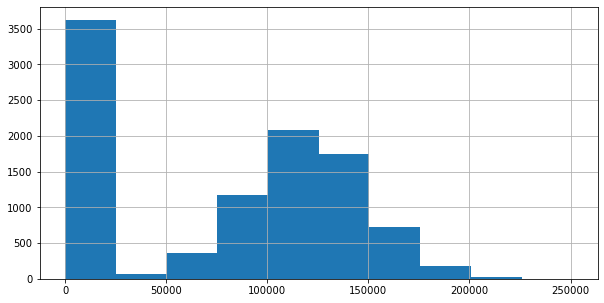

In [60]:
# Visualisasi persebaran balance customer
plt.figure(figsize = (10,5))
df['Balance'].hist()
plt.show()

# Terbanyak customer dengan range balance 0-25 ribu
# Juga banyak customer dengan range balance 100-150 ribu

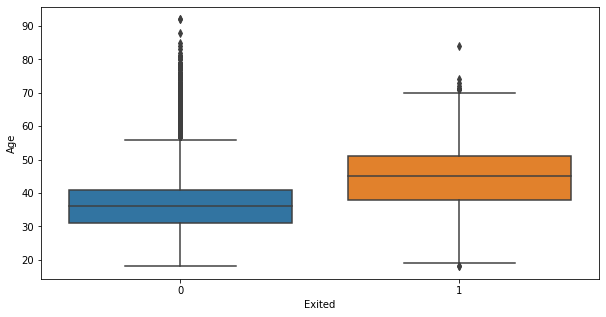

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(df['Exited'],df['Age'])
plt.show()

# Customer yang pindah cenderung berada dalam kategori umur yang lebih tua

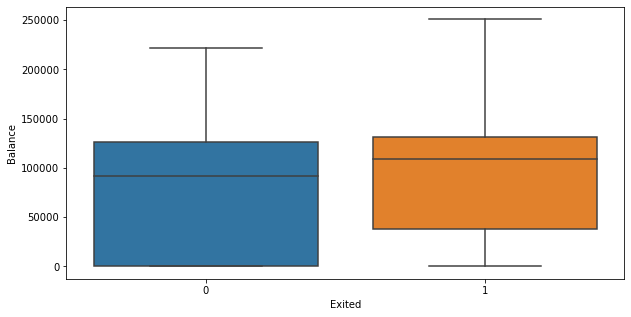

In [56]:
plt.figure(figsize = (10,5))
sns.boxplot(df['Exited'],df['Balance'])
plt.show()

# Customer yang pindah cenderung memiliki balance yang lebih banyak

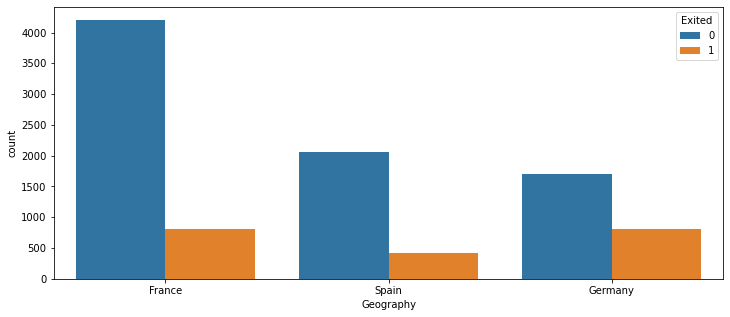

In [54]:
# Perbandingan customer pindah (Exited) dari negaranya
plt.figure(figsize = (12,5))
sns.countplot(x = 'Geography', hue = 'Exited', data = df)
plt.show()

# Kebanyakan customer berasal di Perancis, diikuti dengan Spanyol dan Jerman
# Perbandingan customer yang pindah di Jerman lebih tinggi daripada Perancis dan Spanyol

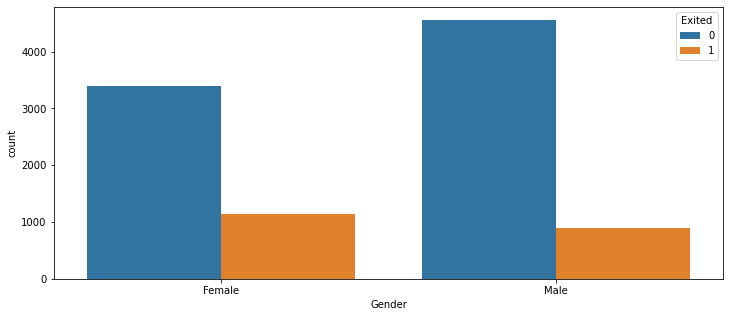

In [51]:
# Perbandingan customer pindah (Exited) dari faktor gendernya
plt.figure(figsize = (12,5))
sns.countplot(x = 'Gender', hue = 'Exited', data = df)
plt.show()

# Customer laki-laki lebih banyak dari wanita
# Customer wanita memiliki kemungkinan pindah yang lebih tinggi daripada laki-laki

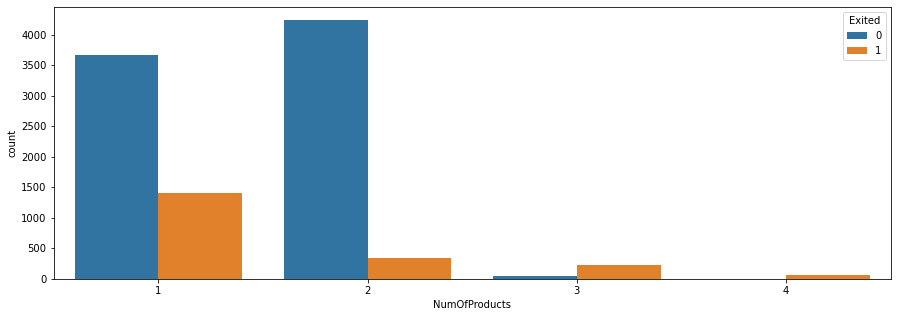

In [53]:
# Perbandingan customer pindah (Exited) dari faktor jumlah produk
plt.figure(figsize = (15,5))
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df)
plt.show()

# Kebanyakan customer hanya memiliki 1-2 produk bank
# Customer dengan produk 3-4 besar kemungkinan pindah
# Customer dengan 2 produk paling kecil kemungkinan pindah

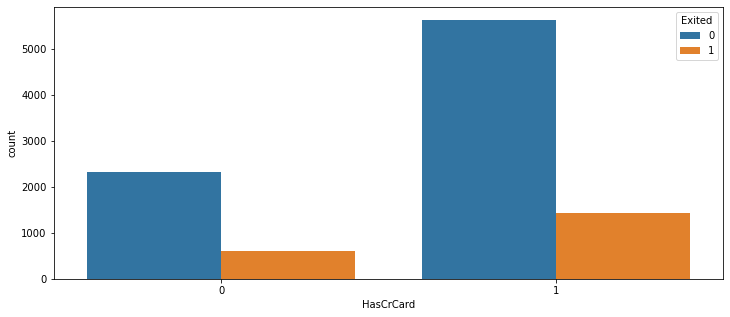

In [65]:
# Perbandingan customer pindah (Exited) dari faktor memiliki kartu kredit
plt.figure(figsize = (12,5))
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df)
plt.show()

# Customer yang memiliki kartu kredit lebih banyak daripada yang tidak
# Perbandingan customer yang pindah bank dari segi kepemilikan kartu kredit cenderung sebanding

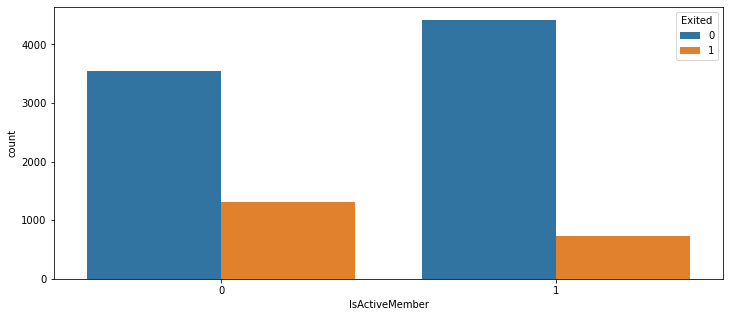

In [66]:
# Perbandingan customer pindah (Exited) dari faktor member aktif
plt.figure(figsize = (12,5))
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df)
plt.show()

# Customer yang merupakan member aktif lebih banyak daripada yang bukan
# Customer yang bukan member aktif lebih tinggi kemungkinan untuk pindah bank

### Insights

- Dari dataset 20% customer pindah bank
- Customer yang pindah cenderung berada dalam kategori usia yang lebih tua
- Customer wanita lebih cenderung pindah bank daripada pria
    - wanita (25% pindah)
    - pria (16% pindah)
- Customer dari Germany lebih kemungkinan pindah dibanding France dan Spain
    - Germany (32% pindah)
    - Spain (17% pindah)
    - France (16% pindah)
- Jumlah produk customer mempengaruhi pindahnya customer
    - customer yang memiliki 3-4 produk cenderung pindah
    - customer yang memiliki 1-2 produk cenderung bertahan
- Kepemilikan kartu kredit tidak mempengaruhi pindahnya customer
    - customer yang memiliki kartu kredit (20% pindah)
    - customer yang tidak memiliki kartu kredit (21% pindah)
- Member aktif mempengaruhi pindahnya customer
    - customer yang member aktif (14% pindah)
    - customer yang bukan member aktif (27% pindah)